ZAD1

In [16]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm

wyniki_data = pd.read_csv("/content/drive/MyDrive/wyniki.csv")

wyniki_f = wyniki_data[wyniki_data["plec"] == "F"]
wyniki_m = wyniki_data[wyniki_data["plec"] == "M"]

wyniki_f = wyniki_f['ocena_koncowa']
wyniki_m = wyniki_m['ocena_koncowa']

stats.ttest_ind(wyniki_f, wyniki_m, alternative='two-sided')

# alpha 0.05; Pvalue >= 0.05 => H0 is VALID

Ttest_indResult(statistic=-1.9404771273257526, pvalue=0.053113174845791505)

ZAD3

In [41]:
import pandas as pd
import statsmodels.api as sm
import plotly.express as px

# Reading the data
data = pd.read_csv("/content/drive/MyDrive/spendingscores.csv")
data["Gender"] = data["Gender"].map({"Male": 1, "Female": 0})

# Creating the independent and dependent variables
x = data[["AnnualIncome", "Age", "Gender"]]
y = data["SpendingScore"]

# Adding a constant to the independent variables
x = sm.add_constant(x)

# Building the model
model = sm.OLS(y.values, x.values).fit()

# Printing the summary of the model
print(model.summary())

p_values = model.pvalues
print(p_values.max())
std_errors = model.bse
coef = model.params

print("P-Values: ", p_values)
print("Standard Deviation: ", std_errors)
print("Coefficients: ", coef)

# Checking the correlation between the variables
corr = data.corr()

# Plotting the correlation matrix using plotly express
fig = px.imshow(corr, labels=dict(x="", y="", color="Correlation"))
fig.show()

# Removing the least important variable
index_of_max_pvalue = np.argmax(p_values)
print(x)
print(p_values)
print(p_values[index_of_max_pvalue])
x = x.drop("AnnualIncome", axis="columns")
print(x)
p_values = sm.OLS(y, x).fit().pvalues

# Building the model again
model = sm.OLS(y, x).fit()

# Printing the summary of the new model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     7.960
Date:                Fri, 27 Jan 2023   Prob (F-statistic):           4.91e-05
Time:                        07:49:01   Log-Likelihood:                -922.05
No. Observations:                 200   AIC:                             1852.
Df Residuals:                     196   BIC:                             1865.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         73.9300      6.642     11.130      0.0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



     const  AnnualIncome  Age  Gender
0      1.0            15   19       1
1      1.0            15   21       1
2      1.0            16   20       0
3      1.0            16   23       0
4      1.0            17   31       0
..     ...           ...  ...     ...
195    1.0           120   35       0
196    1.0           126   45       0
197    1.0           126   32       1
198    1.0           137   32       1
199    1.0           137   30       1

[200 rows x 4 columns]
[1.28775203e-22 9.05093933e-01 3.05517724e-06 5.67117187e-01]
0.9050939326884864
     const  Age  Gender
0      1.0   19       1
1      1.0   21       1
2      1.0   20       0
3      1.0   23       0
4      1.0   31       0
..     ...  ...     ...
195    1.0   35       0
196    1.0   45       0
197    1.0   32       1
198    1.0   32       1
199    1.0   30       1

[200 rows x 3 columns]
                            OLS Regression Results                            
Dep. Variable:          SpendingScore   R-square

ZAD2

      Rok  Zysk
0    1821  1645
1    1822   658
2    1823  1926
3    1824   865
4    1825   764
..    ...   ...
195  2016   988
196  2017   895
197  2018  -178
198  2019   543
199  2020   316

[200 rows x 2 columns]
                                 OLS Regression Results                                
Dep. Variable:                   Zysk   R-squared (uncentered):                   0.814
Model:                            OLS   Adj. R-squared (uncentered):              0.813
Method:                 Least Squares   F-statistic:                              870.1
Date:                Fri, 27 Jan 2023   Prob (F-statistic):                    1.39e-74
Time:                        07:59:26   Log-Likelihood:                         -1522.0
No. Observations:                 200   AIC:                                      3046.
Df Residuals:                     199   BIC:                                      3049.
Df Model:                           1                                           

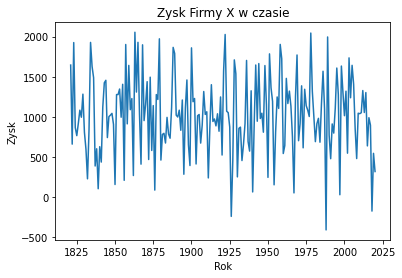

In [49]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

data = pd.read_csv("/content/drive/MyDrive/ZyskiFirmyX.csv")
print(data)

X = data[["Rok"]]
y = data["Zysk"]

model = sm.OLS(y, X).fit()
print(model.summary())

plt.plot(data["Rok"], data["Zysk"])
plt.xlabel("Rok")
plt.ylabel("Zysk")
plt.title("Zysk Firmy X w czasie")
plt.show()
# nie da się zaobserwować trendu